In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Conclave

In [13]:
# data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']
data_sizes = ['1MB', '10MB']
query_numbers = [5]
data_size = '1MB'
query_num = 5

time_taken_col = "time_taken"
cols = ["size", "timestamp", time_taken_col]

conclave_medians = [float("nan")] * 5
conclave_stdevs = [float("nan")] * 5

for i, d in enumerate(data_sizes):
    try:
        path = f"../conclave/join/{d}join.csv"

        # get column with time taken
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]

        # get median and stdev        
        conclave_medians[i] = time_col.median()
        conclave_stdevs[i] = time_col.std()

    except Exception as e:
        print(f"Failed to read file {path} with error {e}")

print("Medians: ", conclave_medians)
print("Stdevs: ", conclave_stdevs)

Medians:  [np.float64(11.21567203500308), np.float64(56.20358712098096), nan, nan, nan]
Stdevs:  [np.float64(0.24267258165293218), np.float64(0.9170295529529938), nan, nan, nan]


# Data Station

In [14]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

datastation_medians = [float("nan")] * 5
datastation_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../datastation-escrow/examples/join_scenario/join/{data_size}.csv"
    
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        # remove first element as it is an outlier
        datastation_medians[i] = time_col[1:].median()
        datastation_stdevs[i] = time_col[1:].std()
    except Exception as e:
        print(f"Failed to read file {path} with error {e}")

print("Medians: ", datastation_medians)
print("Stdevs: ", datastation_stdevs)

Medians:  [np.float64(1.993270488921553), np.float64(2.0490953265689313), np.float64(2.3524734949460253), np.float64(4.4254231485538185), np.float64(21.72927561495453)]
Stdevs:  [np.float64(0.009736655476800582), np.float64(0.013905708592517321), np.float64(0.01408100465126599), np.float64(0.023767976828893776), np.float64(0.11623268732735868)]


# Fast PSI

In [15]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

size_names = [750,7500,75000,750000,7500000]

fpsi_medians = [float("nan")] * 5
fpsi_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col, "offline", "online"]

for i, data_size in enumerate(data_sizes):
    path = f"../Private-Set-Intersection/experiments/ssize{size_names[i]}csize{size_names[i]}.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        fpsi_medians[i] = time_col.median()
        fpsi_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print("Medians: ", fpsi_medians)
print("Stdevs: ", fpsi_stdevs)

Medians:  [np.float64(2.8469567779975478), np.float64(5.926861659012502), np.float64(28.0074272799975), np.float64(457.3182843095128), np.float64(30035.189806732014)]
Stdevs:  [np.float64(0.482723105597852), np.float64(0.5198881099798125), np.float64(0.25906067288393747), np.float64(6.88391989254853), np.float64(222.78252562724376)]


# Plaintext

In [16]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

plaintext_medians = [float("nan")] * 5
plaintext_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../plaintext_tpch_experiments/experiments/distinct_join/{data_size}.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        # remove first trial
        plaintext_medians[i] = time_col[1:].median()
        plaintext_stdevs[i] = time_col[1:].std()
    except:
        print(f"Failed to read file {path}")

print("Medians: ", plaintext_medians)
print("Stdevs: ", plaintext_stdevs)

Medians:  [np.float64(0.04022979451110585), np.float64(0.1038251284626312), np.float64(0.2757127200602554), np.float64(0.9542891629389487), np.float64(4.785003769036848)]
Stdevs:  [np.float64(0.0009776244036412574), np.float64(0.0017116025109530288), np.float64(0.004967200928951495), np.float64(0.019502697447439144), np.float64(0.11842197812046669)]


# Lattigo

In [17]:
data_sizes = ['1MB', '10MB', '100MB', '1GB', '10GB']

lattigo_medians = [float("nan")] * 5
lattigo_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../lattigo-experiments/experiments/{data_size}.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        # drop first trial
        time_col = time_col[1:]
        
        lattigo_medians[i] = time_col.median()
        lattigo_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print("Medians: ", lattigo_medians)
print("Stdevs: ", lattigo_stdevs)

Medians:  [np.float64(0.31364999944344163), np.float64(0.4228281039977446), np.float64(2.3750425429316238), np.float64(18.28812491206918), np.float64(166.86626873607747)]
Stdevs:  [np.float64(0.014549526831814931), np.float64(0.01608692691735544), np.float64(0.021859803374951046), np.float64(0.2791525963454839), np.float64(3.3488653404685)]


# CCF

In [18]:
data_sizes = ['1MB', '10MB', '100MB']

ccf_medians = [float("nan")] * 5
ccf_stdevs = [float("nan")] * 5

time_taken_col = "time_taken"
cols = [time_taken_col]

for i, data_size in enumerate(data_sizes):
    path = f"../ccf_tpch_experiments/data/{data_size}_query_times.csv"
    try:
        data = pd.read_csv(path, names=cols, header=None)
        time_col = data.loc[:,time_taken_col]
        
        # remove first trial
        ccf_medians[i] = time_col.median()
        ccf_stdevs[i] = time_col.std()
    except:
        print(f"Failed to read file {path}")

print("Medians: ", ccf_medians)
print("Stdevs: ", ccf_stdevs)

Medians:  [np.float64(0.5917888879776001), np.float64(7.50512957572937), np.float64(62.397999999999996), nan, nan]
Stdevs:  [np.float64(0.018681486095054597), np.float64(0.20736256024500946), np.float64(0.26293505746561235), nan, nan]


# Plots

[nan, nan, 0.01, 0.01, 0.01]
[np.float64(11.21567203500308), np.float64(56.20358712098096), nan, nan, nan]


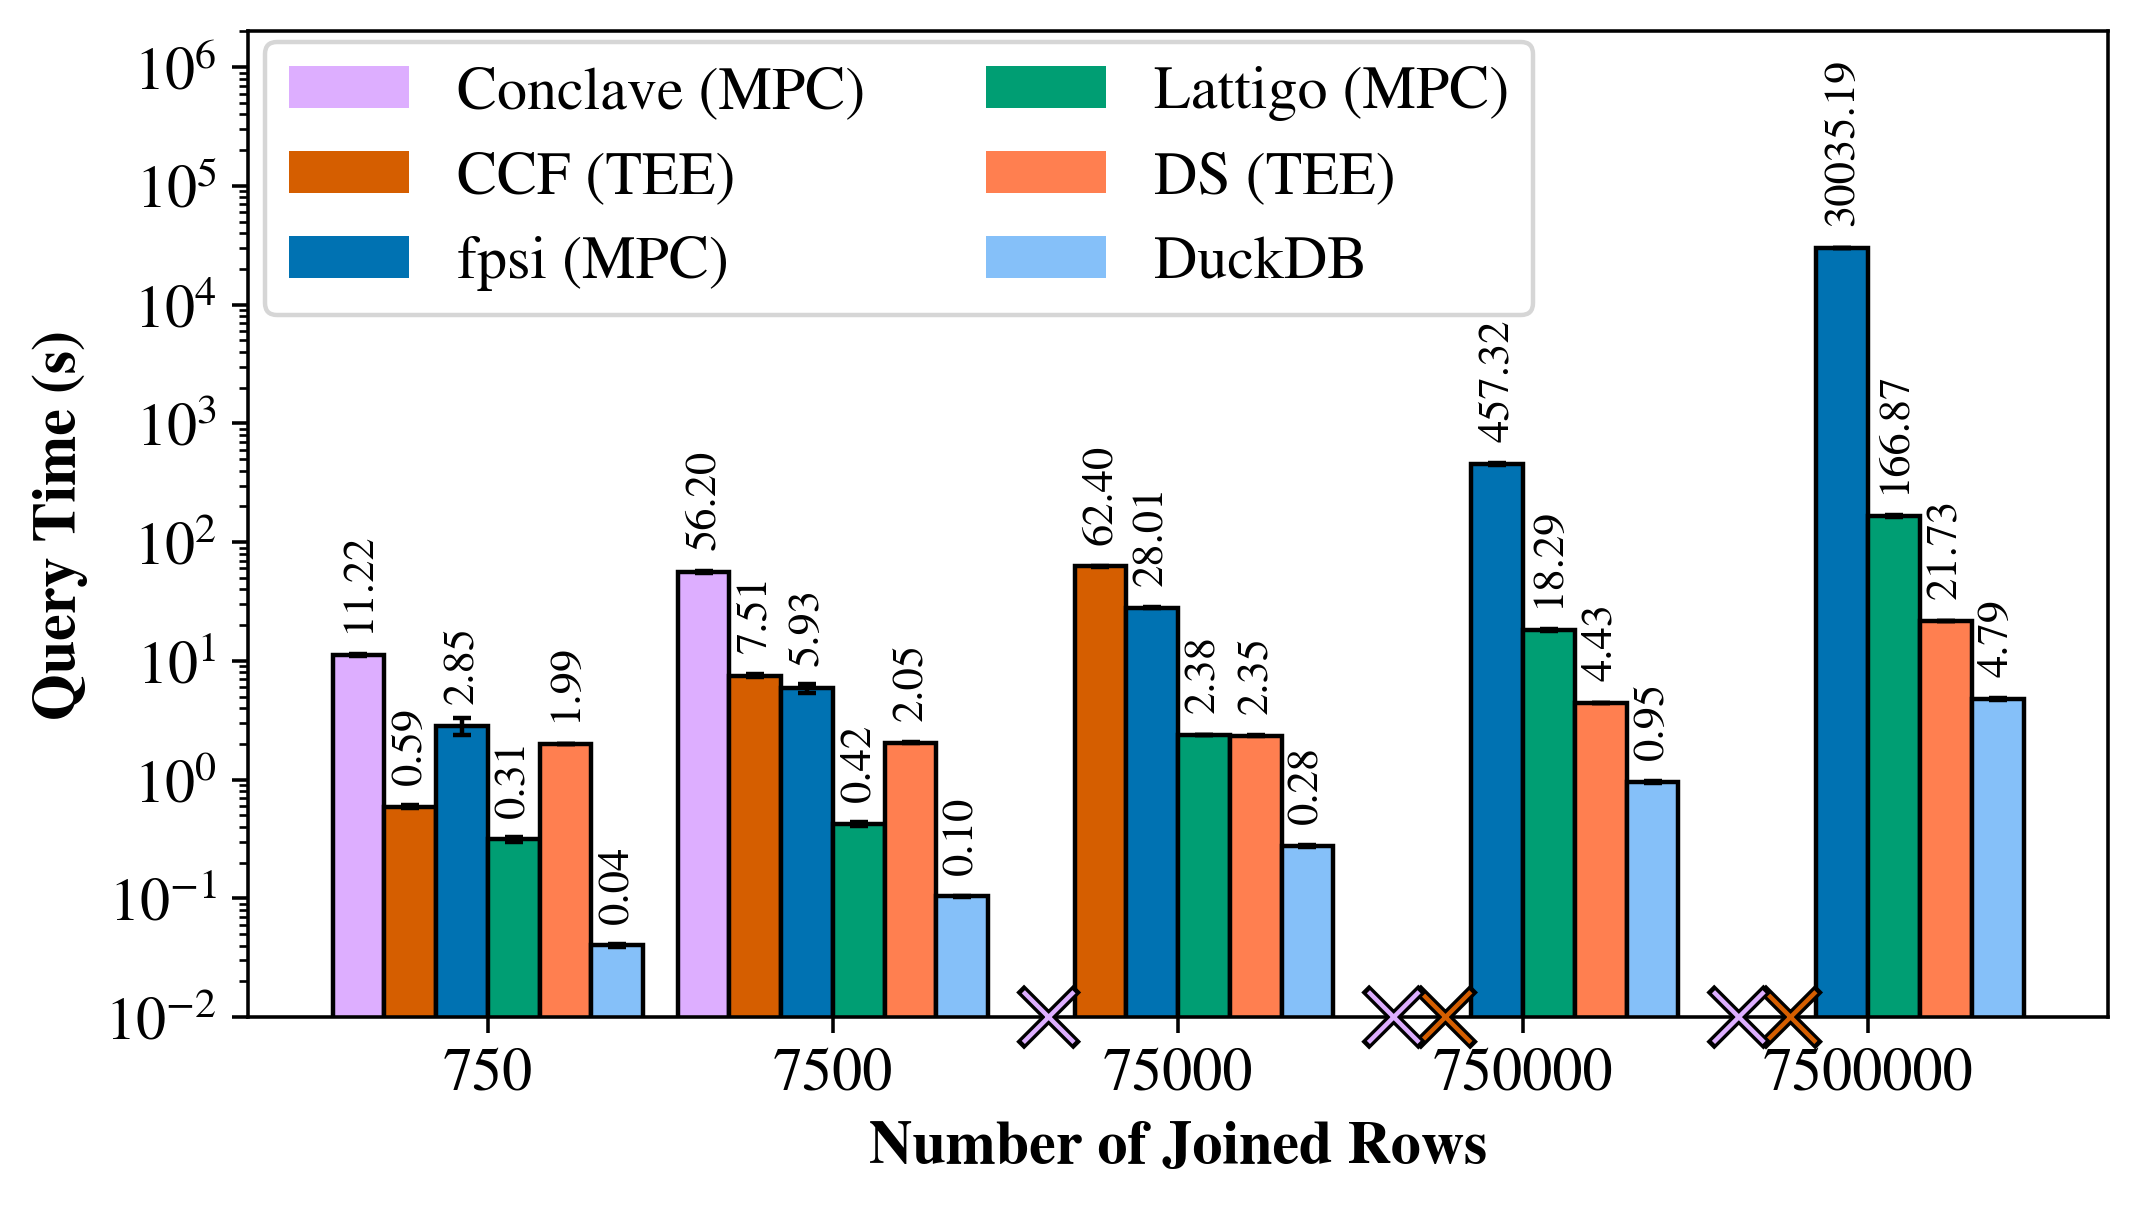

In [42]:
bar_label_font_size = 10
padding = 5

X_axis = np.arange(5) + 1

width = 0.15

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.01
max_y = 2000000

plt.figure(figsize=(7.5, 4), dpi=320)
plt.yscale('log')

# Conclave
conclave_bar = plt.bar(x=X_axis-2.5*width,width=width,height=conclave_medians,label="Conclave (MPC)",
        color='#ddaeff'
        )
plt.bar(x=X_axis-2.5*width,width=width,height=conclave_medians,yerr=conclave_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
left_x = [float("nan") if not np.isnan(row) else min_y for row in conclave_medians]
print(left_x)
plt.scatter(X_axis-2.5*width, left_x, [165]*5,
        #    edgecolors='black',
        #    facecolors = 'black',
           marker='x',
           color = "black",
           zorder=6,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(X_axis-2.5*width,left_x, [130]*5,
        #     edgecolors='black',
        #     facecolors = 'black',
            marker='x',
            color = "#ddaeff",
            zorder=6,
            clip_on=False,
            linewidths=1,
            )
print(conclave_medians)
# print(conclave_medians[:2])
conclave_label = map(lambda n: '{0:.2f}'.format(n),conclave_medians[:2])
plt.bar_label(conclave_bar, conclave_label, fontsize=bar_label_font_size,
              rotation=90, padding=padding)

# CCF
ccf_bar = plt.bar(x=X_axis-1.5*width,width=width,height=ccf_medians,label="CCF (TEE)",
        color='#d55e00'
        )
plt.bar(x=X_axis-1.5*width,width=width,height=ccf_medians,yerr=ccf_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
plt.bar_label(ccf_bar, map(lambda n: '{0:.2f}'.format(n),ccf_medians), fontsize=bar_label_font_size,
                rotation=90, padding=padding)
left_x = [float("nan") if not np.isnan(row) else min_y for row in ccf_medians]
plt.scatter(X_axis-1.5*width, left_x, [165]*5,
        #    edgecolors='black',
        #    facecolors = 'black',
           marker='x',
           color = "black",
           zorder=5,
           clip_on=False,
           linewidths=2.5,
            )
plt.scatter(X_axis-1.5*width,left_x, [130]*5,
        #     edgecolors='black',
        #     facecolors = 'black',
            marker='x',
            color = "#d55e00",
            zorder=5,
            clip_on=False,
            linewidths=1,
            )

# Fast PSI
fpsi_bar = plt.bar(x=X_axis-0.5*width, width=width, height=fpsi_medians, label = "fpsi (MPC)",
        color='#0072b2')

plt.bar(x=X_axis-0.5*width, width=width,height=fpsi_medians,yerr=fpsi_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
fpsi_label = map(lambda n: '{0:.2f}'.format(n),fpsi_medians)
plt.bar_label(fpsi_bar, fpsi_label, fontsize=bar_label_font_size,
              rotation=90, padding=padding)

# Lattigo
lattigo_bar = plt.bar(x=X_axis+0.5*width,width=width,height=lattigo_medians,label="Lattigo (MPC)",
        color='#009E73'
        )
plt.bar(x=X_axis+0.5*width,width=width,height=lattigo_medians,yerr=lattigo_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
lattigo_label = map(lambda n: '{0:.2f}'.format(n),lattigo_medians)
plt.bar_label(lattigo_bar, lattigo_label, fontsize=bar_label_font_size,
              rotation=90, padding=padding)

# Data Station
ds_bar = plt.bar(x=X_axis+1.5*width,width=width,height=datastation_medians,label="DS (TEE)",
        color='coral'
        )

plt.bar(x=X_axis+1.5*width,width=width,height=datastation_medians,yerr=datastation_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.2f}'.format(n),datastation_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
              rotation=90, padding=padding)

# Plaintext
plain_bar = plt.bar(x=X_axis+2.5*width, width=width, height=plaintext_medians, label = "DuckDB",
        color='#85C0F9')

plt.bar(x=X_axis+2.5*width,width=width,height=plaintext_medians,yerr=plaintext_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
plain_label = map(lambda n: '{0:.2f}'.format(n),plaintext_medians)
plt.bar_label(plain_bar, plain_label, fontsize=bar_label_font_size,
              rotation=90, padding=padding)



axes = plt.gca()
axes.set_ylim([min_y,max_y])


plt.xlabel("Number of Joined Rows", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# move legend up slightly
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.35, 1.02))

plt.xticks(X_axis, [750,7500,75000,750000,7500000])

plt.savefig("distinct_join.pdf", bbox_inches='tight')

plt.show()